In [223]:
import pandas as pd
import matplotlib.pyplot as plt



In [224]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [225]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [226]:
df.drop('Serial No.',axis=1,inplace=True)

In [227]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [228]:
df.duplicated().sum()

np.int64(0)

In [229]:
x = df.iloc[:,0:7]
y = df.iloc[:,-1]

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [232]:
x_train.shape,x_test.shape

((320, 7), (80, 7))

In [233]:
from sklearn.preprocessing import MinMaxScaler

In [234]:
scaler = MinMaxScaler()

In [235]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [236]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [237]:
model = Sequential([
    (Dense(7,activation='relu',input_dim=7)),
    (Dense(7,activation='relu')),
    (Dense(1,activation='linear'))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [238]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [239]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [240]:
history = model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0000e+00 - loss: 0.3512 - val_accuracy: 0.0000e+00 - val_loss: 0.3604
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.2737 - val_accuracy: 0.0000e+00 - val_loss: 0.2971
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.2246 - val_accuracy: 0.0000e+00 - val_loss: 0.2355
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1903 - val_accuracy: 0.0000e+00 - val_loss: 0.1796
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.1416 - val_accuracy: 0.0000e+00 - val_loss: 0.1322
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.1049 - val_accuracy: 0.0000e+00 - val_loss: 0.0956
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0845 - val_accuracy: 0.0000e+00 - val_loss: 0.0692
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+

In [241]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [242]:
from sklearn.metrics import mean_squared_error,r2_score

In [243]:
print((mean_squared_error(y_pred,y_test)))
print((r2_score(y_pred,y_test)*100))

0.01098808845935945
60.51676238988395


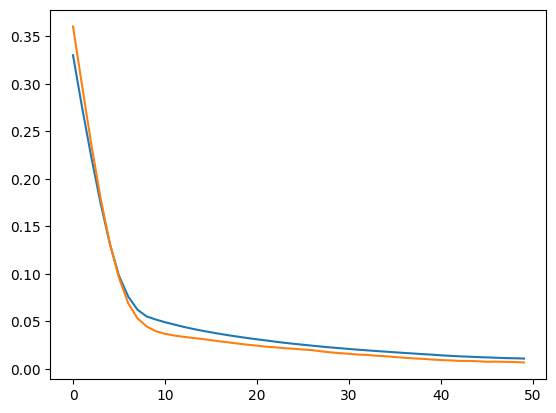

In [244]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

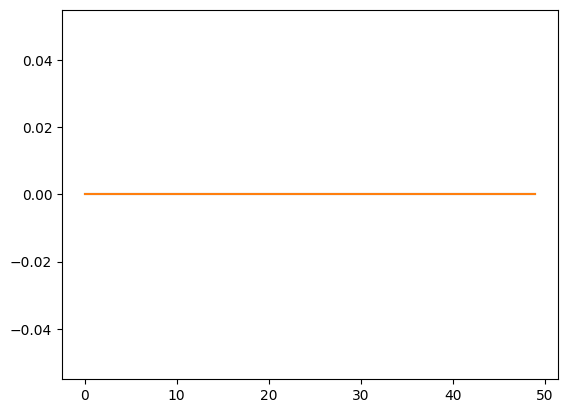

In [245]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])